# Plant Disease Classification - CNN

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

(256, 256, 3)


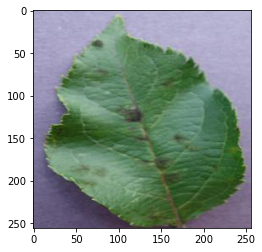

In [3]:
my_data_dir = 'C:\\plant_diseases(ori)'
os.listdir(my_data_dir)

# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'

test_path = my_data_dir+'\\valid\\'
train_path = my_data_dir+'\\train\\'

os.listdir(test_path)

os.listdir(train_path)

os.listdir(train_path+'\\Apple___Apple_scab')[0]

apple_scab = train_path+'\\Apple___Apple_scab\\' + '00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

apple_scab_img = imread(apple_scab)
plt.imshow(apple_scab_img)

image_shape = apple_scab_img.shape
print(image_shape)

In [4]:
print(apple_scab_img.max())
print(apple_scab_img.min())

print(len(os.listdir(train_path+'\\Apple___Apple_scab\\')))
print(len(os.listdir(train_path + '\\Peach___healthy\\')))
print(len(os.listdir(test_path+'\\Apple___Apple_scab\\')))
print(len(os.listdir(test_path + '\\Peach___healthy\\')))

226
0
2016
1728
504
432


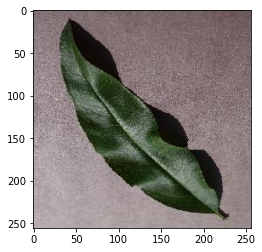

In [5]:
plt.imshow(imread(train_path + '\\Peach___healthy\\' + '017d3d86-12bf-4280-8929-10dcd504ac46___Rutg._HL 3671.JPG'))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

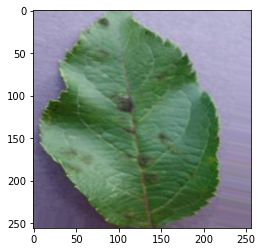

In [7]:
plt.imshow(image_gen.random_transform(apple_scab_img))

In [8]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.3))

model.add(Dense(38))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        9

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

batch_size = 16

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [12]:
train_image_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
4394/4394 [==============================] - 2229s 506ms/step - loss: 1.8836 - accuracy: 0.4437 - val_loss: 0.8795 - val_accuracy: 0.7304
Epoch 2/10
4394/4394 [==============================] - 1454s 331ms/step - loss: 0.9285 - accuracy: 0.7066 - val_loss: 0.5550 - val_accuracy: 0.8210
Epoch 3/10
4394/4394 [==============================] - 1579s 359ms/step - loss: 0.6924 - accuracy: 0.7787 - val_loss: 0.4251 - val_accuracy: 0.8656
Epoch 4/10
4394/4394 [==============================] - 1366s 311ms/step - loss: 0.5858 - accuracy: 0.8137 - val_loss: 0.3369 - val_accuracy: 0.8890
Epoch 5/10
4394/4394 [==============================] - 1324s 301ms/step - loss: 0.5264 - accuracy: 0.8315 - val_loss: 0.2814 - val_accuracy: 0.9066
Epoch 6/10
4394/4394 [==============================] - 1710s 389ms/step - loss: 0.4767 - accuracy: 0.8484 - val_loss: 0.2656 - val_accuracy: 0.9141
Epoch 7/10
4394/4394 [==============================] - 1662s 378ms/step - loss: 0.4352 - accuracy: 0.8622

In [15]:
from tensorflow.keras.models import load_model
model.save("plant_disease_classifier.h5")

<AxesSubplot:>

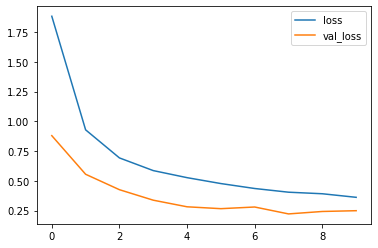

In [16]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [17]:
model.evaluate_generator(test_image_gen)

[0.24882161617279053, 0.9186774492263794]

In [18]:
from tensorflow.keras.preprocessing import image

In [19]:
pred_probabilities = model.predict(test_image_gen)

In [20]:
test_image_gen.classes

array([ 0,  0,  0, ..., 37, 37, 37])

In [21]:
predictions = [np.argmax(i) for i in pred_probabilities]

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       504
           1       0.98      0.89      0.94       497
           2       0.98      0.91      0.94       440
           3       0.94      0.87      0.91       502
           4       0.89      0.99      0.93       454
           5       0.94      0.97      0.96       421
           6       0.98      0.92      0.95       456
           7       0.85      0.85      0.85       410
           8       1.00      0.94      0.97       477
           9       0.86      0.96      0.90       477
          10       0.98      0.99      0.99       465
          11       0.97      0.94      0.95       472
          12       0.97      0.96      0.97       480
          13       0.94      0.99      0.97       430
          14       0.94      0.97      0.96       423
          15       0.97      0.99      0.98       503
          16       0.93      0.85      0.89       459
          17       0.95    

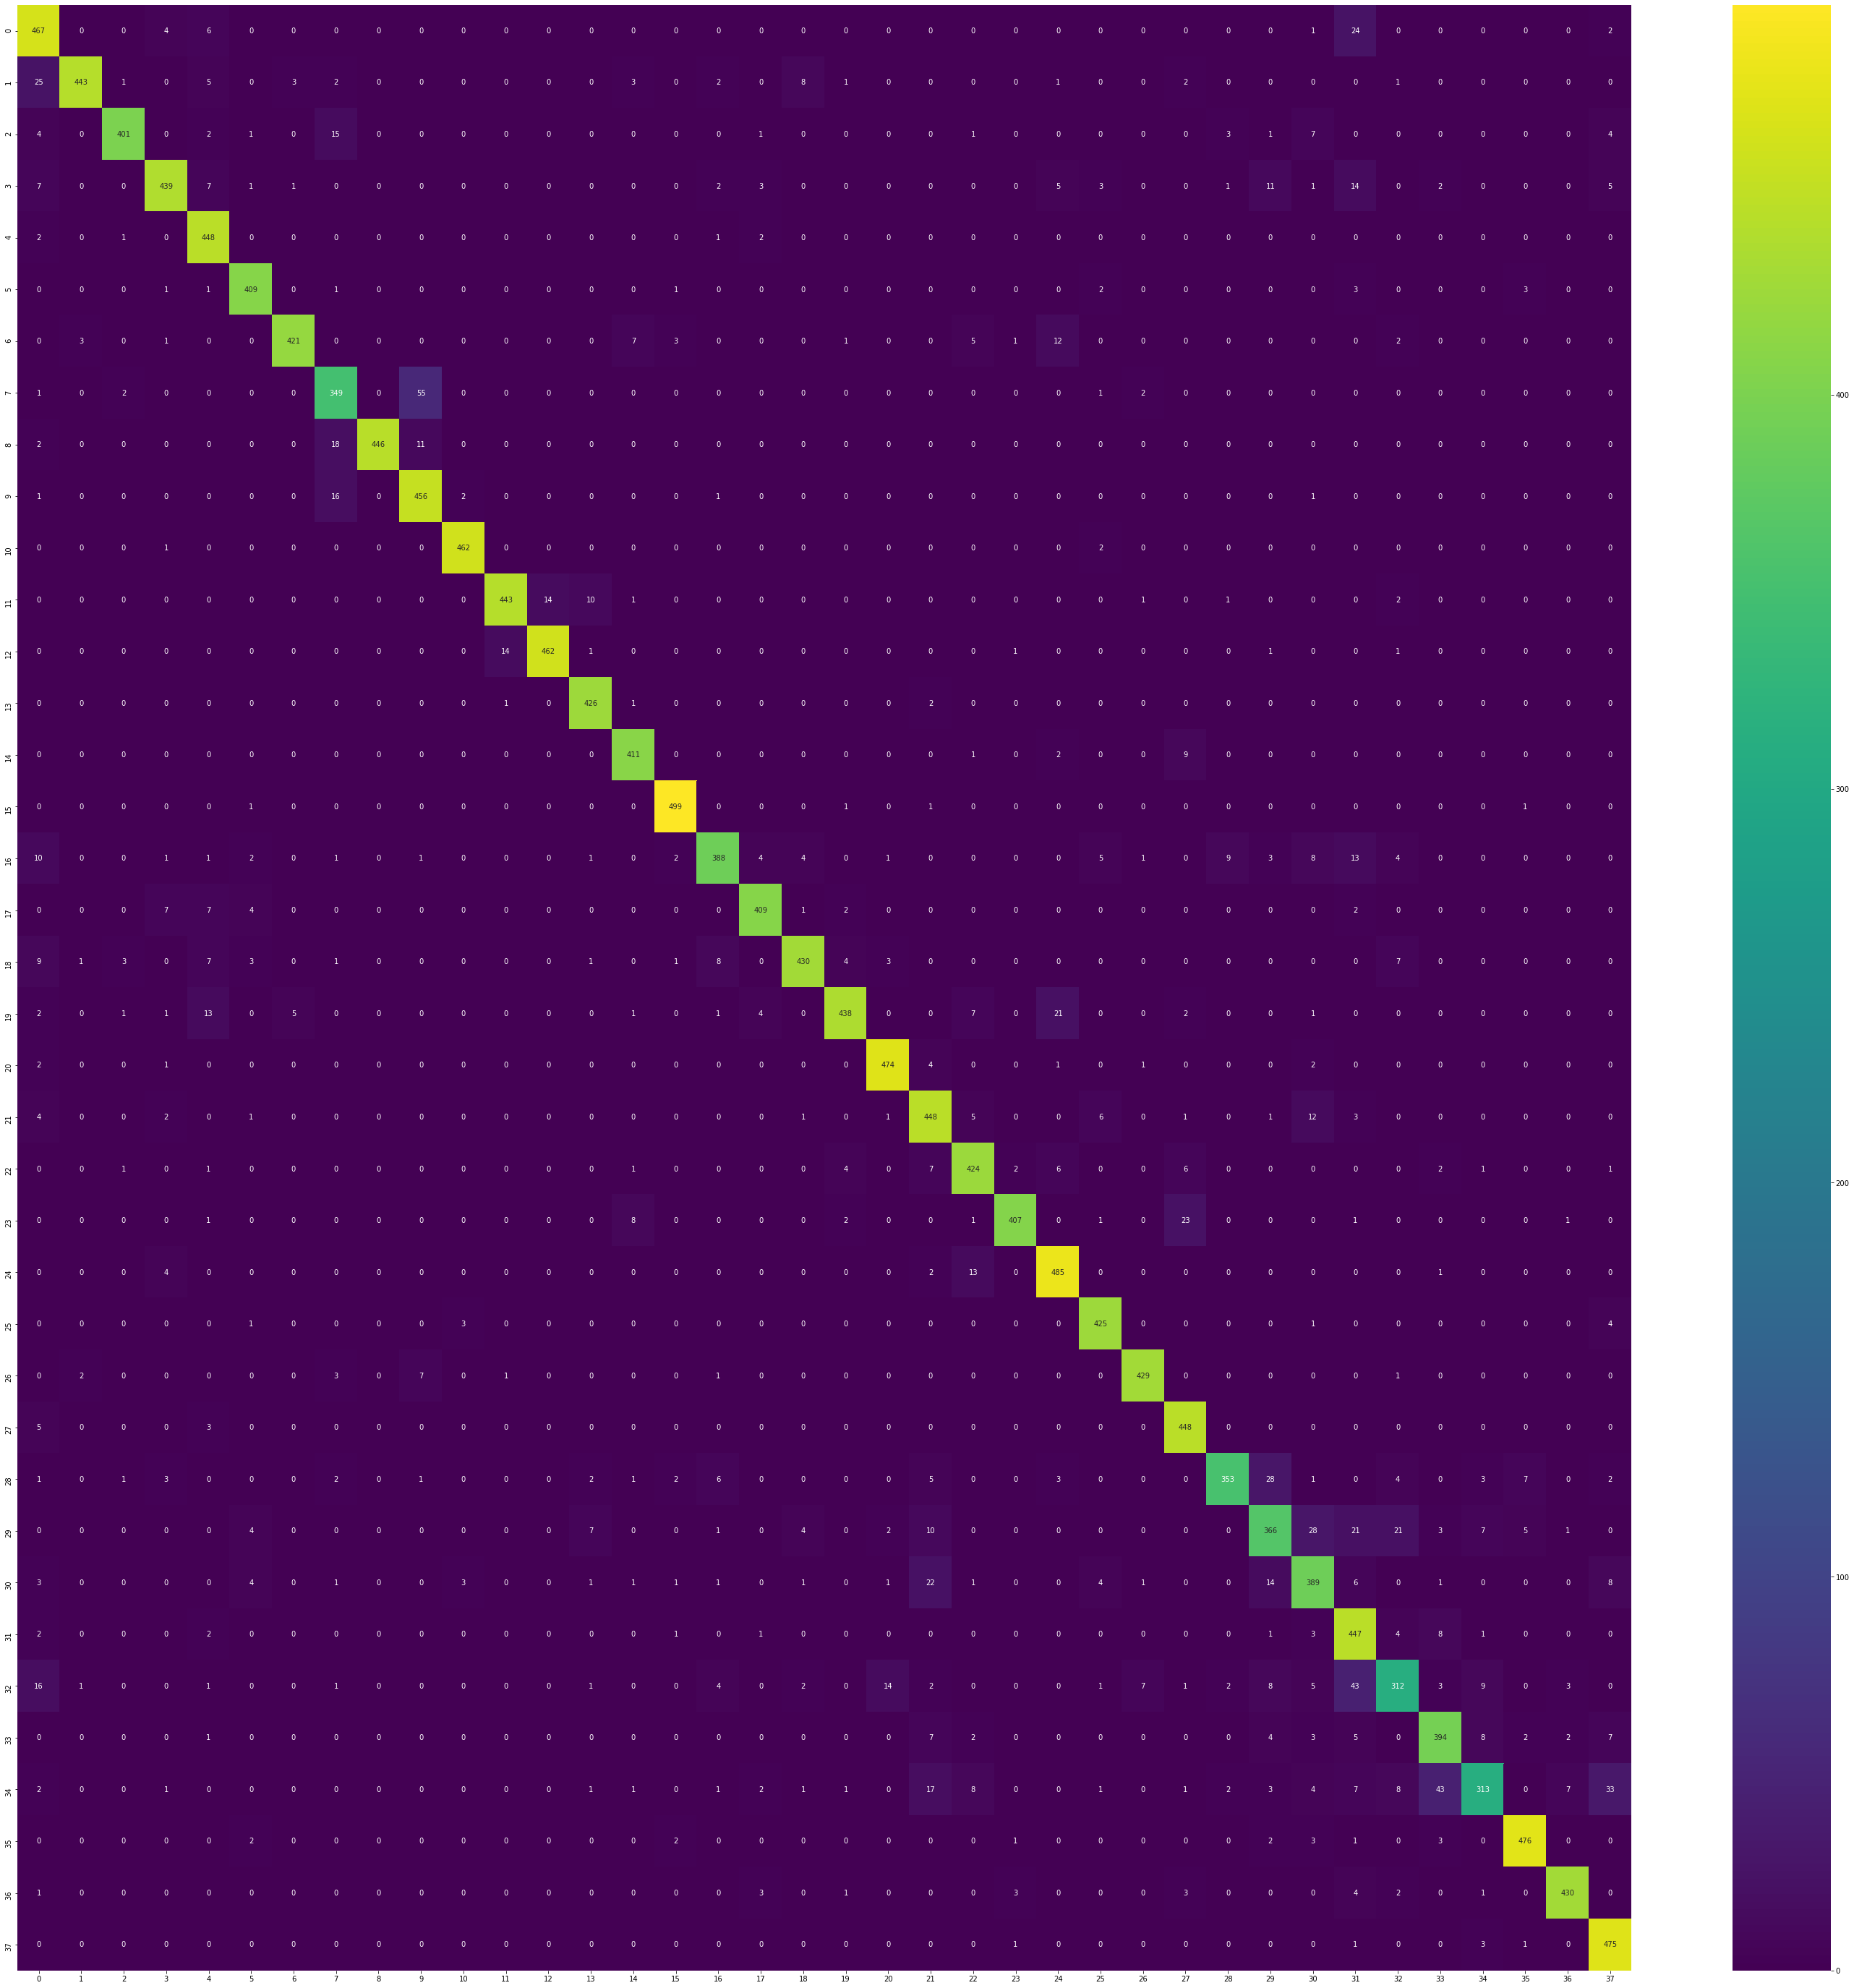

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_image_gen.classes,predictions))
plt.figure(figsize=(50,50))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot = True, fmt = "d", cmap = "viridis");

Min Value: 0.0
Max Value: 0.99609375


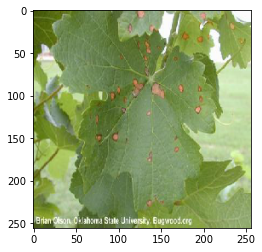

In [23]:
image_to_predict = image.load_img('C:\\plant_diseases(ori)\\post_train_testing\\grape-br.JPG', target_size=(256,256))
image_to_predict = np.expand_dims(image_to_predict, axis=1)
image_to_predict = image_to_predict.reshape(256, 256, 3)
image_to_predict = image_to_predict / 256
plt.imshow(image_to_predict)
print("Min Value: " + str(image_to_predict.min()))
print("Max Value: " + str(image_to_predict.max()))

In [24]:
list(train_image_gen.class_indices.keys())[2]

'Apple___Cedar_apple_rust'

In [25]:
prediction = model.predict(image_to_predict.reshape(1, 256, 256, 3))
predicted_index = prediction.argmax(axis=1)[0]
print("Predicted class: " + list(train_image_gen.class_indices.keys())[predicted_index])
print("Confidence: " + str(round(prediction.max(axis=1)[0] * 100, 2)) + "%")

Predicted class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Confidence: 99.92%


prediction wrong

Min Value: 0.0
Max Value: 0.99609375


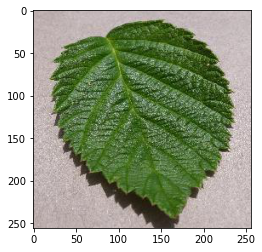

In [26]:
image_to_predict = image.load_img('C:\\plant_diseases(ori)\\post_train_testing\\raspberry.JPG', target_size=(256,256))
image_to_predict = np.expand_dims(image_to_predict, axis=1)
image_to_predict = image_to_predict.reshape(256, 256, 3)
image_to_predict = image_to_predict / 256
plt.imshow(image_to_predict)
print("Min Value: " + str(image_to_predict.min()))
print("Max Value: " + str(image_to_predict.max()))

In [27]:
prediction = model.predict(image_to_predict.reshape(1, 256, 256, 3))
predicted_index = prediction.argmax(axis=1)[0]
print("Predicted class: " + list(train_image_gen.class_indices.keys())[predicted_index])
print("Confidence: " + str(round(prediction.max(axis=1)[0] * 100, 2)) + "%")

Predicted class: Raspberry___healthy
Confidence: 99.98%


prediction correct

Min Value: 0.0
Max Value: 0.99609375


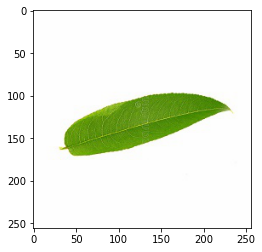

In [28]:
image_to_predict = image.load_img('C:\\plant_diseases(ori)\\post_train_testing\\peach-leaf.JPG', target_size=(256,256))
image_to_predict = np.expand_dims(image_to_predict, axis=1)
image_to_predict = image_to_predict.reshape(256, 256, 3)
image_to_predict = image_to_predict / 256
plt.imshow(image_to_predict)
print("Min Value: " + str(image_to_predict.min()))
print("Max Value: " + str(image_to_predict.max()))

In [29]:
prediction = model.predict(image_to_predict.reshape(1, 256, 256, 3))
predicted_index = prediction.argmax(axis=1)[0]
print("Predicted class: " + list(train_image_gen.class_indices.keys())[predicted_index])
print("Confidence: " + str(round(prediction.max(axis=1)[0] * 100, 2)) + "%")

Predicted class: Apple___Cedar_apple_rust
Confidence: 90.28%


prediction correct

Min Value: 0.0
Max Value: 0.99609375


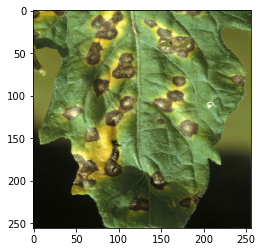

In [30]:
image_to_predict = image.load_img('C:\\plant_diseases(ori)\\post_train_testing\\tomato sep.JPG', target_size=(256,256))
image_to_predict = np.expand_dims(image_to_predict, axis=1)
image_to_predict = image_to_predict.reshape(256, 256, 3)
image_to_predict = image_to_predict / 256
plt.imshow(image_to_predict)
print("Min Value: " + str(image_to_predict.min()))
print("Max Value: " + str(image_to_predict.max()))

In [31]:
prediction = model.predict(image_to_predict.reshape(1, 256, 256, 3))
predicted_index = prediction.argmax(axis=1)[0]
print("Predicted class: " + list(train_image_gen.class_indices.keys())[predicted_index])
print("Confidence: " + str(round(prediction.max(axis=1)[0] * 100, 2)) + "%")

Predicted class: Potato___Early_blight
Confidence: 86.69%


prediction wrong